    The main goal to o select sentences that have a clearly positive or negative connotaton. Dataset contains sentences labelled with positive or negative sentiment, extracted from reviews of products, movies, and restaurants.

    DATA PREPARATION AND EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd
import os

In [4]:
os.chdir('C:\\Users\\michal.lubas\\Desktop\\python\\projects')

In [5]:
yelp=pd.read_csv('yelp_labelled.txt',sep='\t',names=['text', 'sentiment'] )

In [6]:
imdb=pd.read_csv('imdb_labelled.txt',sep='\t',names=['text', 'sentiment'] )

In [7]:
amazon=pd.read_csv('amazon_cells_labelled.txt',sep='\t',names=['text', 'sentiment'] )

In [8]:
sentences = pd.concat([yelp,imdb,amazon])

In [9]:
sentences['text_length'] = sentences['text'].apply(len) 

In [10]:
sentences=sentences.reset_index()
del sentences['index']

In [11]:
sentences.head(3)

,text,sentiment,text_length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41


In [28]:
import seaborn as sns
%matplotlib inline

In [34]:
temp_sentences = sentences [ sentences['text_length'] < 300 ] 

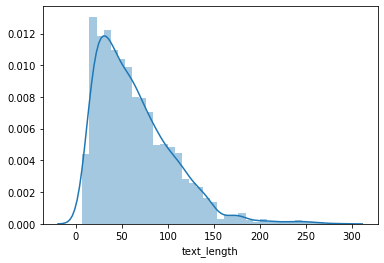

In [44]:
sns.distplot(temp_sentences['text_length'])

mostly length between 25 - 75

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B1FABF848>,
      dtype=object)

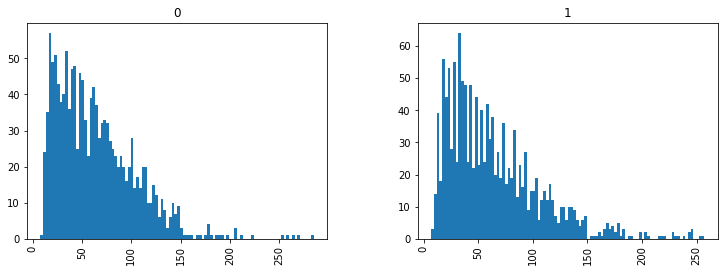

In [43]:
temp_sentences.hist(column='text_length', by='sentiment', bins=100,
                   figsize=(12,4))

    No dependency can be seen between text_length and positive or negative sentences

    Starting text optimization

In [1]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [139]:
def text_optimization1(text):
    temp_text = [ char for char in text if char not in string.punctuation]
    return ''.join(temp_text).split() 

In [62]:
conda install nltk

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [65]:
import nltk

In [66]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


        C:\Users\michal.lubas\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


In [94]:
from nltk.corpus import stopwords

In [106]:
def text_optimization2(text):
    temp_char_list = [ char for char in text 
                 if char not in string.punctuation]
    temp_string = ''.join(temp_char_list)
    return [word for word in temp_string.split() 
            if word.lower() not in stopwords.words('english') ]  

In [136]:
sentences[['text','sentiment']].head(3)

,text,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [140]:
sentences['text'].head(3).apply(text_optimization1)

0                            [Wow, Loved, this, place]
1                               [Crust, is, not, good]
2    [Not, tasty, and, the, texture, was, just, nasty]
Name: text, dtype: object

Tokenization

In [119]:
from sklearn.feature_extraction.text import CountVectorizer

In [156]:
bow_transfor=CountVectorizer(analyzer=text_optimization2).fit(sentences['text'])

Coding

In [168]:
text_bow = bow_transfor.transform(sentences['text'])

Train_test_split

In [143]:
from sklearn.model_selection import train_test_split

In [174]:
X=text_bow
y=sentences['sentiment']

In [175]:
 X_train, X_test, y_train, y_test = train_test_split(X,
        y, test_size=0.3, random_state=101)

Weighing words

In [147]:
from sklearn.feature_extraction.text import TfidfTransformer

In [176]:
tfidf_transformer = TfidfTransformer().fit(X_train)

Tfidf model

In [177]:
text_tfidf = tfidf_transformer.transform(X_train)

Detection model

In [150]:
from sklearn.naive_bayes import MultinomialNB

In [178]:
sentiment_detect_model = MultinomialNB().fit(text_tfidf,y_train)

In [179]:
predictions = sentiment_detect_model.predict(X_test)

Check model

In [180]:
from sklearn.metrics import confusion_matrix, classification_report

In [181]:
print( classification_report(y_test,predictions))
print( confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75       414
           1       0.74      0.82      0.78       411

    accuracy                           0.77       825
   macro avg       0.77      0.77      0.77       825
weighted avg       0.77      0.77      0.77       825

[[293 121]
 [ 72 339]]


In [171]:
sentiment_detect_model = MultinomialNB().fit(X_train,y_train)

In [172]:
predictions = sentiment_detect_model.predict(X_test)

In [173]:
print( classification_report(y_test,predictions))
print( confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       414
           1       0.75      0.79      0.77       411

    accuracy                           0.76       825
   macro avg       0.77      0.76      0.76       825
weighted avg       0.77      0.76      0.76       825

[[305 109]
 [ 85 326]]


Pipline with decision tree

In [182]:
from sklearn.pipeline import Pipeline

In [196]:
X=sentences['text']
y=sentences['sentiment']

In [197]:
 X_train, X_test, y_train, y_test = train_test_split(X,
        y, test_size=0.3, random_state=101)

In [195]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
pipeline = Pipeline ([
    ('bow of words', CountVectorizer(analyzer=text_optimization2)),
    ('tfidf', TfidfTransformer()),
    ('decisionTree', DecisionTreeClassifier())
        ]
    )

In [199]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('bow of words',
                 CountVectorizer(analyzer=<function text_optimization2 at 0x0000023B31ED9828>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_no

In [200]:
predictions = pipeline.predict(X_test)

In [201]:
print( classification_report(y_test,predictions))
print( confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71       414
           1       0.71      0.73      0.72       411

    accuracy                           0.72       825
   macro avg       0.72      0.72      0.72       825
weighted avg       0.72      0.72      0.72       825

[[288 126]
 [109 302]]


MultinomialNB() is better than DecisionTreeClassifier for above dataset